# PE decay

In [24]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import matplotlib.pyplot as plt
torch.manual_seed(42)

In [25]:
def get_fn(n=1024, d=512, base=10000):
    two_t = torch.arange(0, d, step=2).float()
    theta_t = base ** (-two_t/d)
    cos_t = torch.cos(n * theta_t )
    fn = torch.sum(cos_t)
    return fn, cos_t

In [44]:
d = 4096
x=range(d//2)
fn_list = []
fn_v_list = []

def get_batch(relative_pose=[], d=d):
    fn_list = []
    fn_v_list = []
    for i in relative_pose:
        fn, fn_v = get_fn(n=i, d=d)
        y=fn_v.tolist()
        fn_list.append(fn)
        fn_v_list.append(y)
    return fn_list, fn_v_list

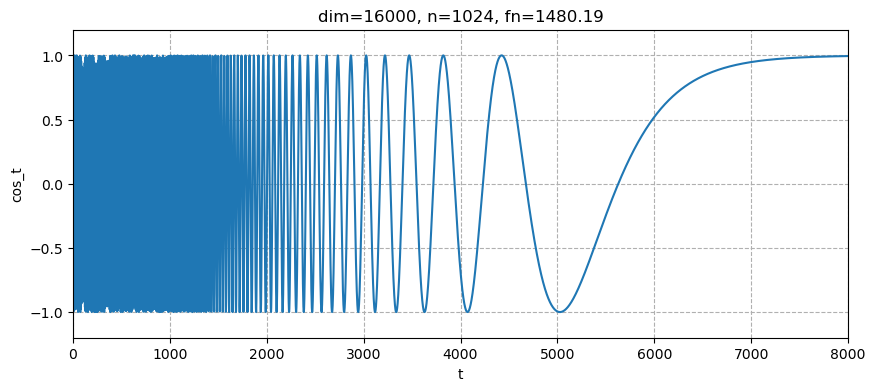

In [98]:
d = 16000
n = 1024
fn, fn_v = get_fn(n=n, d=d)
x=range(d//2)
fig, (ax) = plt.subplots(nrows=1, ncols=1, figsize=(10, 4))
# plt.subplots_adjust(left=0.125, bottom=0.11, right=0.88, top=0.90, wspace=0.2, hspace=0.5)

ax.plot(x, fn_v)
ax.set_title(f'dim={d}, n={n}, fn={fn:.2f}')
ax.set_xlabel("t")
ax.set_ylabel("cos_t")
ax.set_xlim(0, d//2)
ax.set_ylim(-1.2, 1.2)
ax.grid(linestyle='--')
# ax.axhline(y=fn_v[0], color='r', linestyle='--')

plt.show()


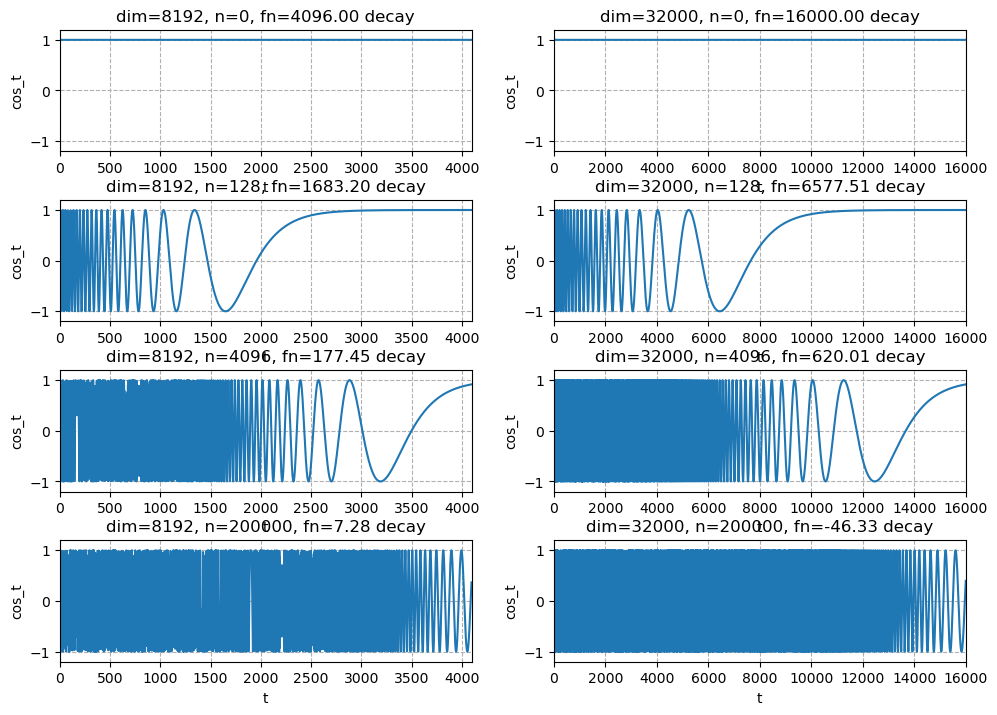

In [95]:
n_list = [0, 128, 4096, 200000]
fig, (ax_list) = plt.subplots(nrows=len(n_list), ncols=2, figsize=(12, 8))
plt.subplots_adjust(left=0.125, bottom=0.11, right=0.88, top=0.90, wspace=0.2, hspace=0.4)

d = 8192
x=range(d//2)
col = 0

fn_list, fn_v_list = get_batch(n_list, d)
for i in range(len(n_list)):
    ax_list[i][col].plot(x, fn_v_list[i])
    # fn = round(fn_list[i], 2)
    ax_list[i][col].set_title(f'dim={d}, n={n_list[i]}, fn={fn_list[i]:.2f} decay')
    ax_list[i][col].set_xlabel("t")
    ax_list[i][col].set_ylabel("cos_t")
    ax_list[i][col].set_xlim(0, d//2)
    ax_list[i][col].set_ylim(-1.2, 1.2)
    ax_list[i][col].grid(linestyle='--')

d = 32000
x=range(d//2)
fn_list, fn_v_list = get_batch(n_list, d)
col = 1
for i in range(len(n_list)):
    ax_list[i][col].plot(x, fn_v_list[i])
    ax_list[i][col].set_title(f'dim={d}, n={n_list[i]}, fn={fn_list[i]:.2f}')
    ax_list[i][col].set_xlabel("t")
    ax_list[i][col].set_ylabel("cos_t")
    ax_list[i][col].set_xlim(0, d//2)
    ax_list[i][col].set_ylim(-1.2, 1.2)
    ax_list[i][col].grid(linestyle='--')


# 显示图像
plt.show()